In [8]:
import sys,os
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
os.chdir('drive/MyDrive/Notebook Machine Learning/Projet/')

OSError: [Errno 107] Transport endpoint is not connected: 'drive/MyDrive/Notebook Machine Learning/Projet/'

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Optional: advanced model outside the course (XGBoost)
try:
    from xgboost import XGBRegressor
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False

# Display options
pd.set_option("display.max_columns", 100)


# Load dataset
data_path = "2015-building-energy-benchmarking.csv"
df_initial = pd.read_csv(data_path)

print("Shape of raw dataset:", df_inti.shape)
df_initial.head()

OSError: [Errno 107] Transport endpoint is not connected: '2015-building-energy-benchmarking.csv'

# 1 : Basic cleaning

In [11]:
df=df_initial.copy()

Columns:
 ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'TaxParcelIdentificationNumber', 'Location', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultData', 'Comment', 'ComplianceStatus', 'Outlier', '2010 Census Tracts', 'Seattle Police Department Micr

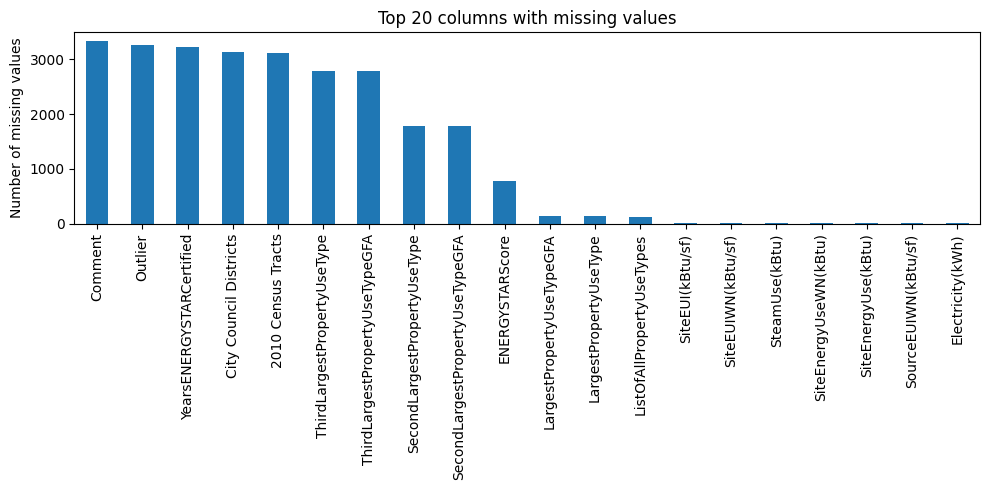

,count,mean,std,min,25%,50%,75%,max
OSEBuildingID,3340.0,2.052217e+04,1.151152e+04,1.0,19921.75,22977.0,25748.000,50059.0
DataYear,3340.0,2.015000e+03,0.000000e+00,2015.0,2015.00,2015.0,2015.000,2015.0
CouncilDistrictCode,3340.0,4.450898e+00,2.127203e+00,1.0,3.00,4.0,7.000,7.0
YearBuilt,3340.0,1.967625e+03,3.294985e+01,1900.0,1947.00,1973.0,1996.000,2015.0
NumberofBuildings,3340.0,1.035629e+00,7.844628e-01,1.0,1.00,1.0,1.000,39.0
NumberofFloors,3332.0,4.682173e+00,5.458460e+00,0.0,2.00,4.0,5.000,99.0
PropertyGFATotal,3340.0,9.077289e+04,1.493058e+05,20000.0,28487.00,43855.0,88428.000,2200000.0
PropertyGFAParking,3340.0,1.105403e+04,3.529633e+04,-3.0,0.00,0.0,4304.250,512608.0
PropertyGFABuilding(s),3340.0,7.971886e+04,1.292314e+05,-50550.0,26683.00,41326.0,78726.000,2200000.0
LargestPropertyUseTypeGFA,3204.0,7.488154e+04,1.236249e+05,5872.0,25000.00,39000.0,72067.500,1719643.0


In [12]:
#Missing values

print("Columns:\n", df.columns.tolist())
print("\nBasic info:")
df.info()

print("\nMissing values per column:")
missing_counts = df.isna().sum().sort_values(ascending=False)
print(missing_counts)

# Visualize missing values (top 20 columns with most missing)
plt.figure(figsize=(10,5))
missing_counts.head(20).plot(kind="bar")
plt.title("Top 20 columns with missing values")
plt.ylabel("Number of missing values")
plt.tight_layout()
plt.show()

# Basic statistics for numeric columns
df.describe().T.head(20)

In [13]:
#2 Dropping non-informative columns

id_like_cols = [
    "OSEBuildingID",
    "PropertyName",
    "TaxParcelIdentificationNumber",
    "Location",
    "DefaultData",
    "Comment",
    "2010 Census Tracts",
    "Seattle Police Department Micro Community Policing Plan Areas",
    "City Council Districts",
    "SPD Beats",
    "Zip Codes"
]

existing_id_cols = [c for c in id_like_cols if c in df.columns]
df = df.drop(columns=existing_id_cols)
print("Shape after dropping id-like columns:", df.shape)

Shape after dropping id-like columns: (3340, 36)


Shape after dropping rows with missing or zero target: (3328, 36)


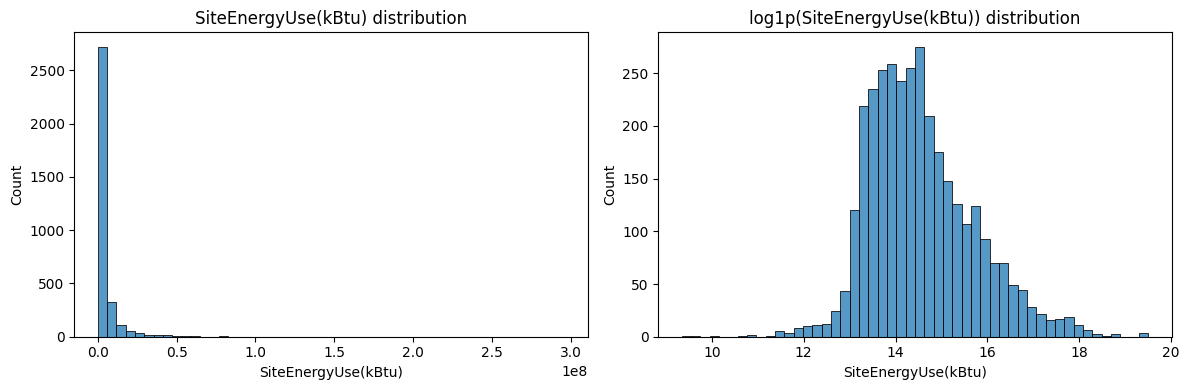

In [14]:
#3 Target selection

target_col = "SiteEnergyUse(kBtu)"
assert target_col in df.columns, "Target column not found in dataframe."

# Keep only rows where the target is not missing and strictly positive
df = df[df[target_col].notna()]
df = df[df[target_col] > 0]

print("Shape after dropping rows with missing or zero target:", df.shape)

# Plot target distribution (raw and log)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[target_col], bins=50, ax=axes[0])
axes[0].set_title(f"{target_col} distribution")

sns.histplot(np.log1p(df[target_col]), bins=50, ax=axes[1])
axes[1].set_title(f"log1p({target_col}) distribution")

plt.tight_layout()
plt.show()

In [15]:
#4 Outliers handling (simple percentile rule)

upper_limit = df[target_col].quantile(0.99)
print(f"99th percentile of {target_col}: {upper_limit:.2f}")

df = df[df[target_col] <= upper_limit]
print("Shape after outlier removal:", df.shape)

99th percentile of SiteEnergyUse(kBtu): 55911707.96
Shape after outlier removal: (3294, 36)


# 2 : Exploratory Data Analysis

In [16]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Number of numeric columns:", len(numeric_cols))
print("Number of categorical columns:", len(categorical_cols))

Number of numeric columns: 26
Number of categorical columns: 10


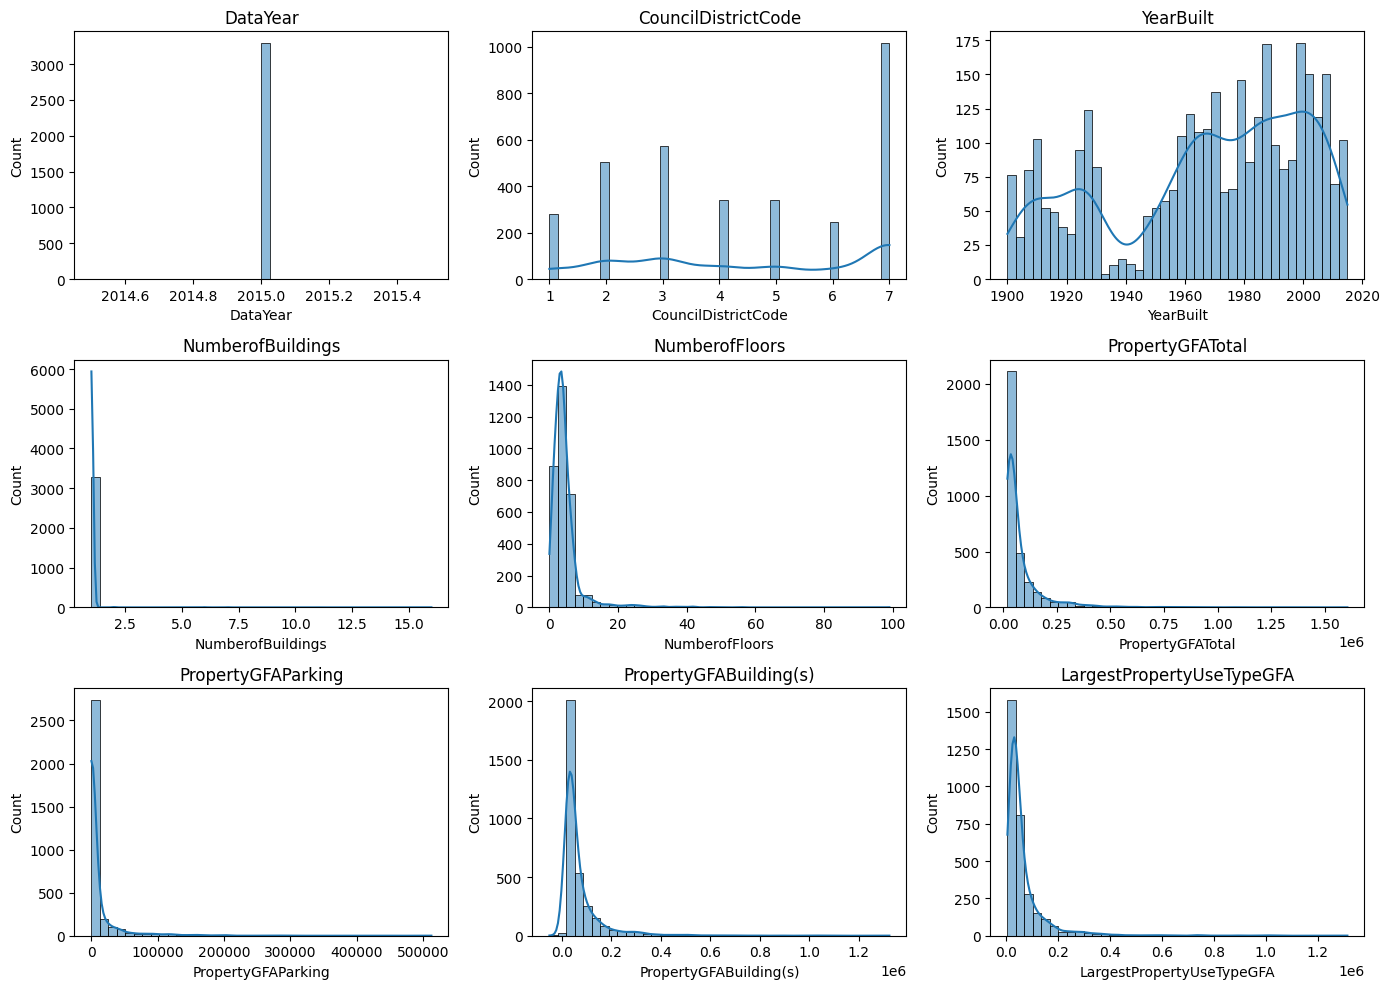

In [17]:
#1 Histograms of numeric variables

numeric_sample = df[numeric_cols].sample(min(5000, len(df)), random_state=42)

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols[:9], 1):
    plt.subplot(3, 3, i)
    sns.histplot(numeric_sample[col], bins=40, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

The numerical variables in the dataset are almost all highly right-skewed, with long tails and several extreme outliers. Surface-related features such as PropertyGFATotal, PropertyGFABuilding(s) and LargestPropertyUseTypeGFA show particularly heavy-tailed distributions, meaning that a small number of very large buildings dominate the upper range.


This justifies applying preprocessing steps such as median imputation, scaling, and potentially removing the top 1% outliers of the target variable.


YearBuilt show multimodal patterns that suggest non-linear relationships with energy use; therefore, we will use non-linear models like Random Forest or Gradient Boosting to outperform linear regression.


DataYear is the same for every building so we will remove it.

NumberOfBuildings, NumberOfFloors include rare extreme values that need attention but remain relevant.

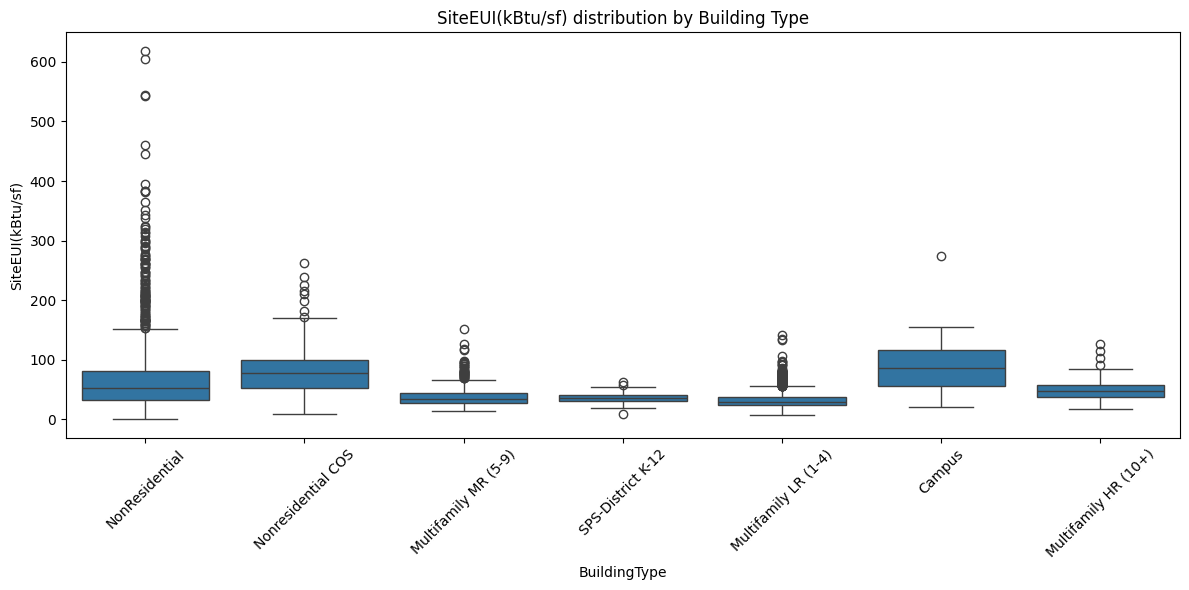

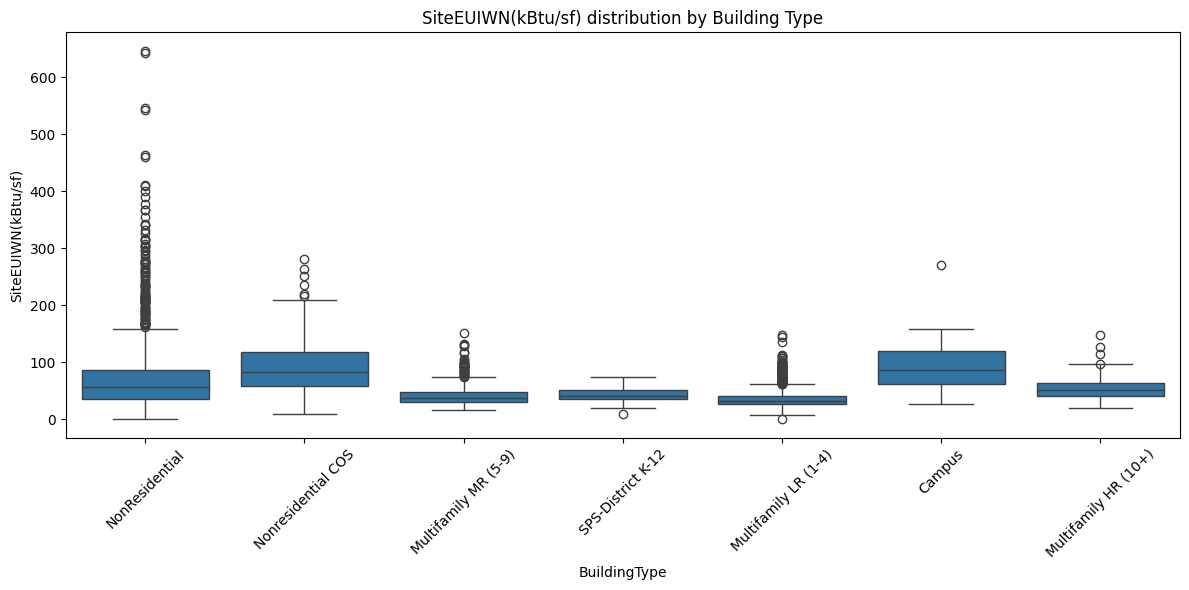

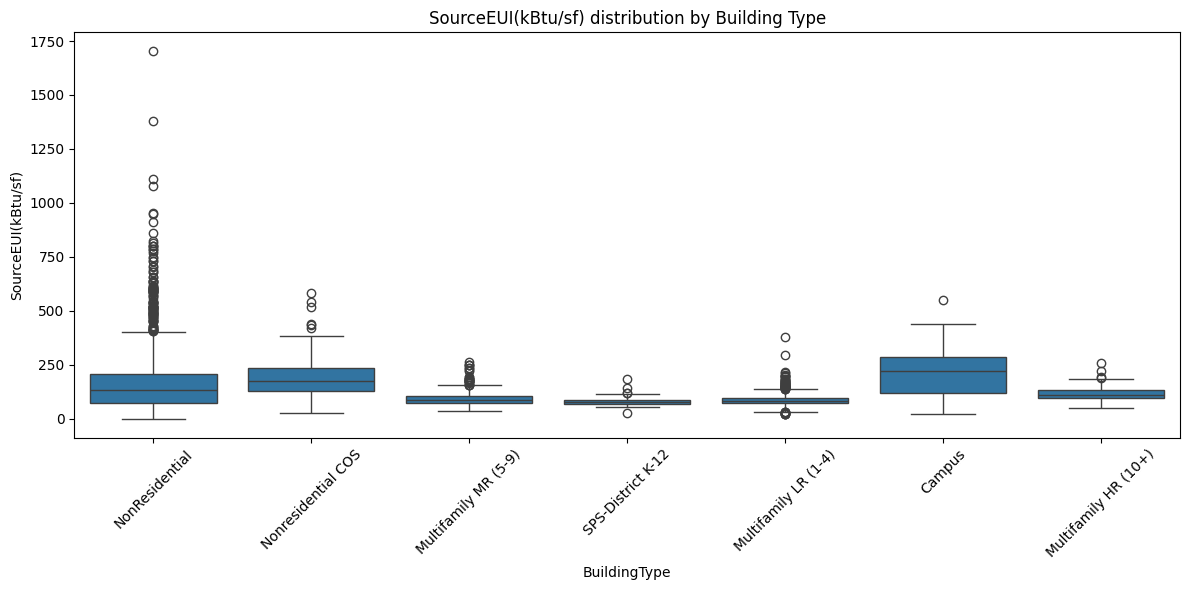

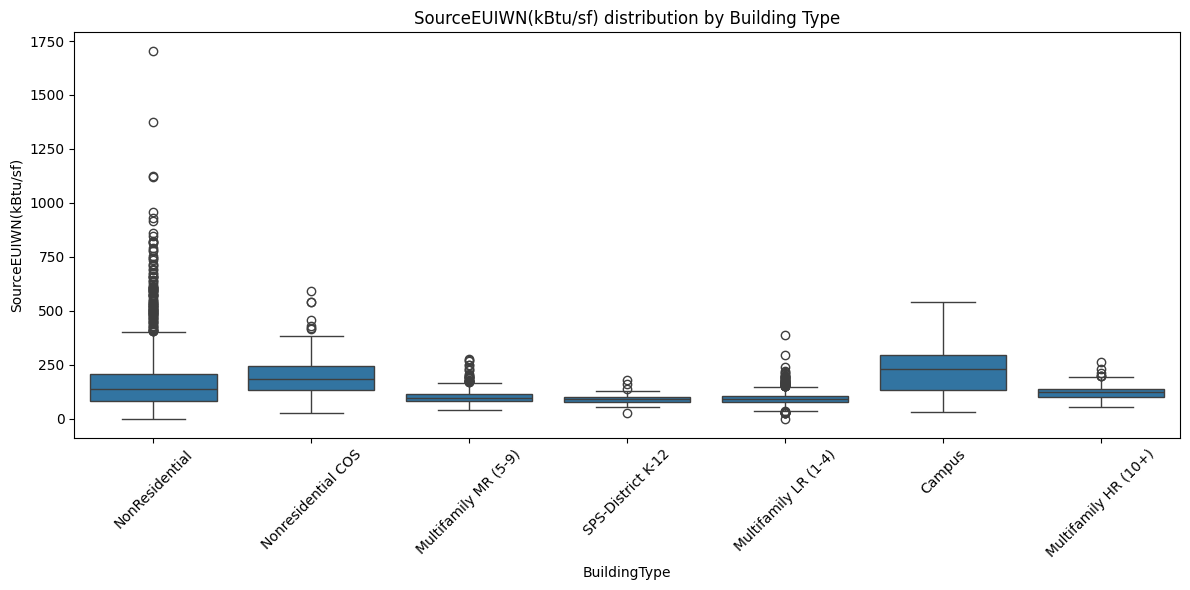

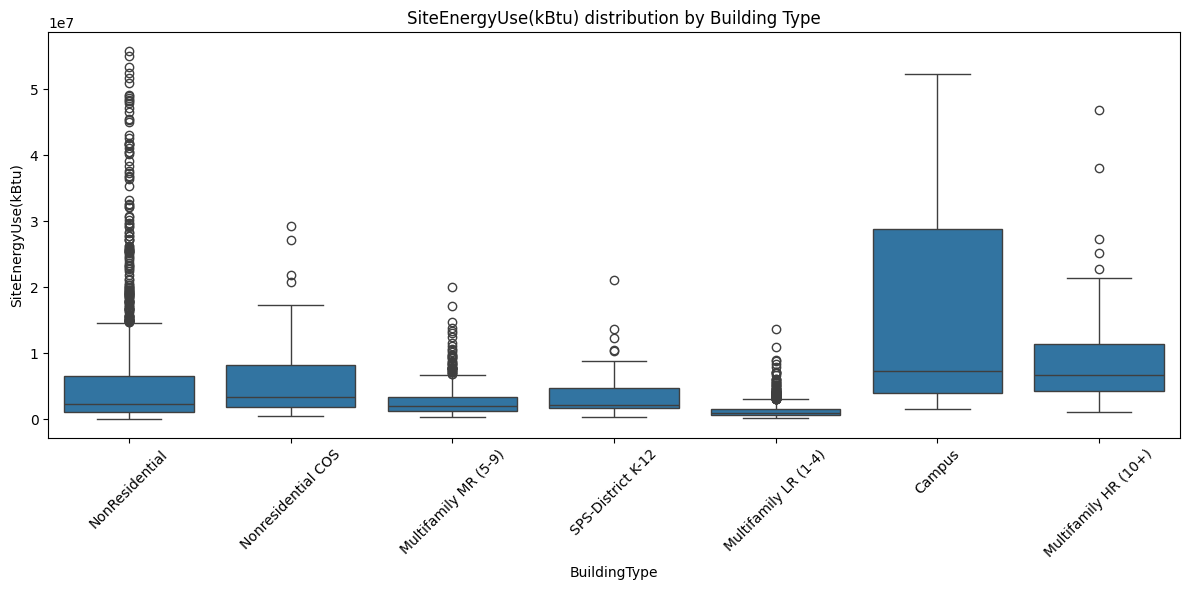

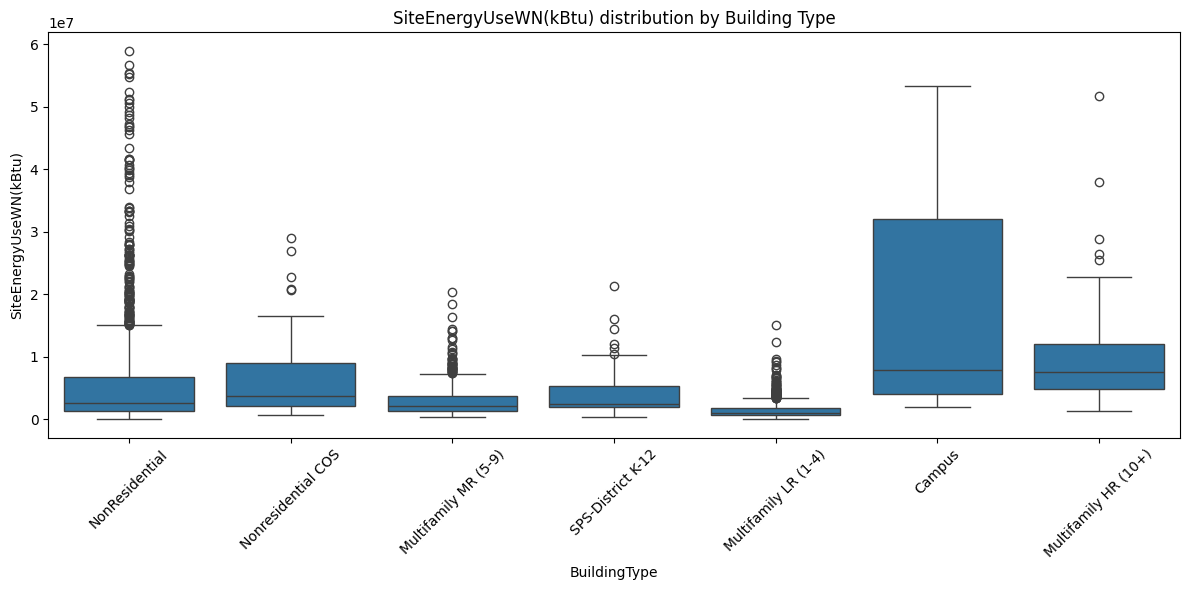

In [18]:
#2 Boxplots: energy by building type

energy_cols = [c for c in df.columns if "EUI" in c or "Energy" in c]

for col in energy_cols:
    if df[col].dtype != object:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x="BuildingType", y=col)
        plt.xticks(rotation=45)
        plt.title(f"{col} distribution by Building Type")
        plt.tight_layout()
        plt.show()

**Observations**

Energy consumption is strongly dependent on building type.

Campus and Nonresidential buildings show the highest energy use values—both in intensity (EUI) and in total consumption—with extremely wide variability and many outliers.

In contrast, all Multifamily categories are much more homogeneous and consistently show lower energy use. This confirms that building function is one of the most important predictors in the dataset.

Additionally, weather normalization has little impact on the distributions, indicating that intrinsic building characteristics dominate over climate effects.

 Finally, the presence of extreme outliers—especially in Campus and Nonresidential groups—justifies applying an upper percentile cutoff (e.g. top 1%) to stabilize model training

**Consequences**

- Keep BuildingType, very useful
- Remove the top 1% of the target variable
- log-transform of EUI
- One-hot encoding for BuildinType
- Remove the weather normalized versions (WN), which are not useful. So we keep only SiteEUI(kBtu/sf), SourceEUI(kBtu/sf) and SiteEnergyUse(kBtu)

,mean,median,count
BuildingType,,,
Multifamily LR (1-4),1.364255e+06,962526.5,1026
Multifamily MR (5-9),2.777289e+06,1980277.5,554
SPS-District K-12,3.573923e+06,2196843.0,93
NonResidential,5.723004e+06,2360872.0,1430
Nonresidential COS,6.153876e+06,3322250.0,67
Multifamily HR (10+),9.018851e+06,6731043.5,106
Campus,1.643356e+07,7330591.5,18


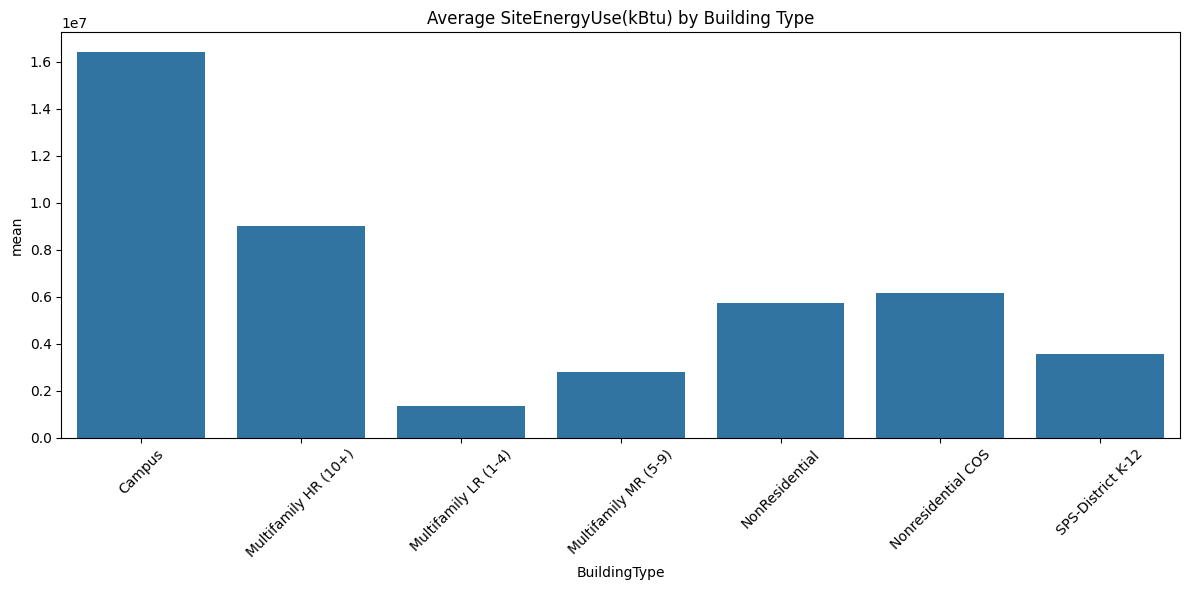

In [19]:
#3 Focus on SiteEnergyUse by building type

if "BuildingType" in df.columns:
    grouped = df.groupby("BuildingType")[target_col].agg(["mean", "median", "count"])
    display(grouped.sort_values("mean"))

    plt.figure(figsize=(12,6))
    sns.barplot(data=grouped.reset_index(), x="BuildingType", y="mean")
    plt.xticks(rotation=45)
    plt.title(f"Average {target_col} by Building Type")
    plt.tight_layout()
    plt.show()

Confirm what we said before, with more clarity.

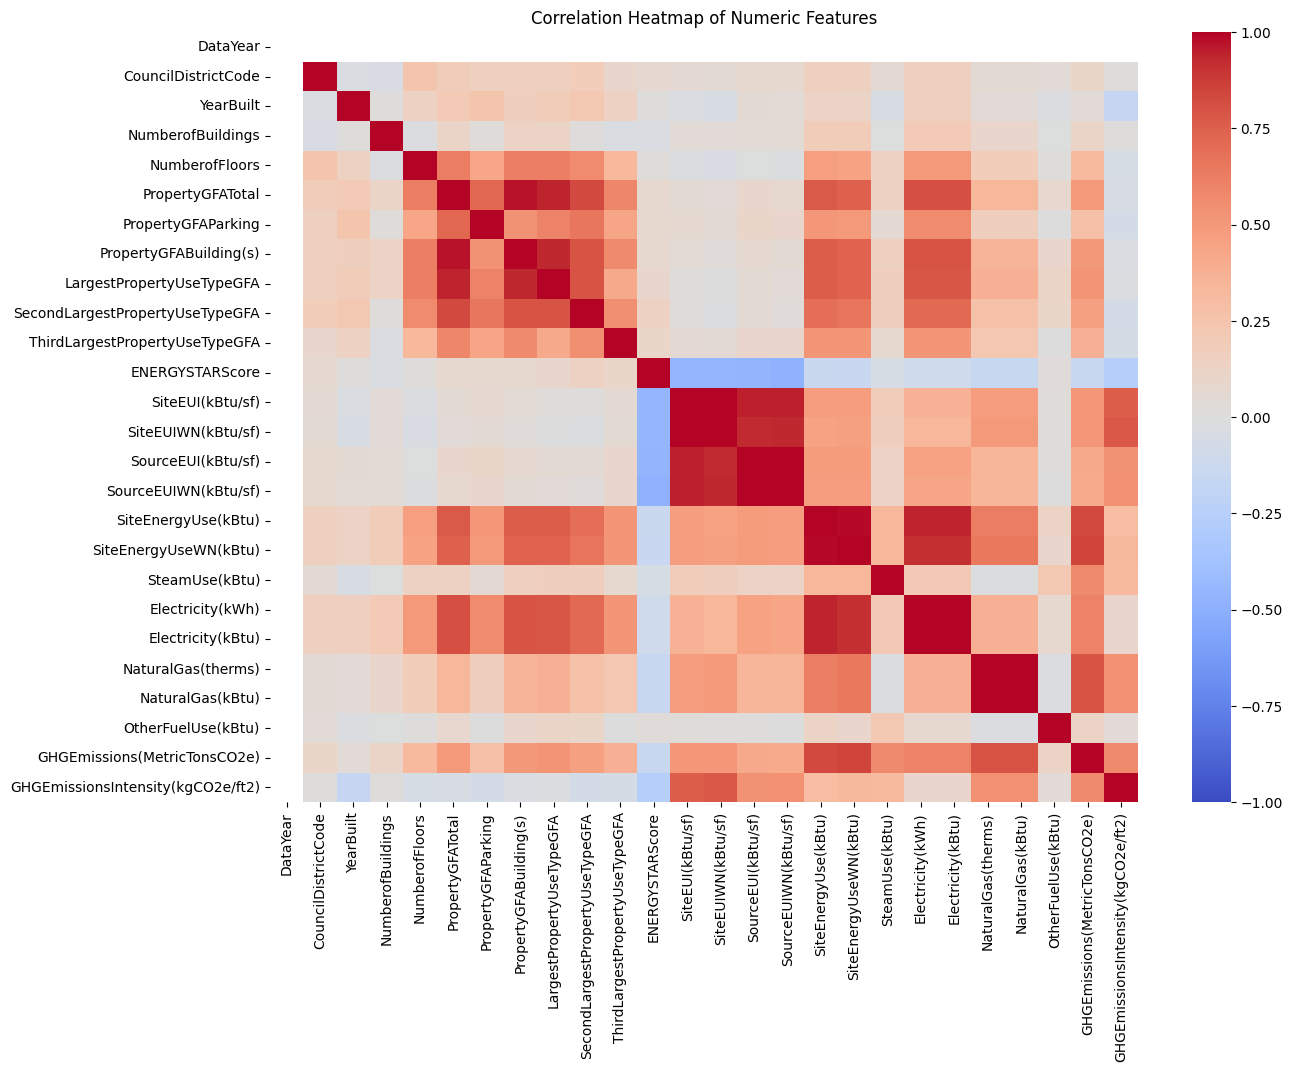

In [20]:
#4 Correlation heatmap

plt.figure(figsize=(14, 10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

**Observations**

The correlation heatmap reveals several important structural patterns in the dataset.

A first cluster composed of gross floor area–related features (PropertyGFATotal, PropertyGFABuilding(s), Largest/Second/ThirdPropertyUseTypeGFA) shows extremely high correlations (up to 0.95), indicating redundancy. These variables all describe building size, so we will simplify them to avoid multicollinearity, keeping only the most informative ones.

A second dominant cluster groups all energy consumption variables (SiteEUI, SourceEUI, SiteEnergyUse, electricity, steam, gas, GHG emissions). These features are strongly interdependent and, more importantly, many of them are derived directly from the target variable. They must therefore be excluded from the model to prevent target leakage.

We see a negative correlation between ENERGYSTARScore and energetic intensities, which is coherent : more a building is efficient, the less is its energy consumption. We can make the hypotesis that it will be a good predictor.

Overall, this analysis confirms the necessity to remove derived energy variables, reduce redundancy among GFA-related features, and preserve structural building characteristics.

**Consequences**

- Delete these columns which are derived from the target : Electricity(kWh) ;
Electricity(kBtu) ;
SteamUse(kBtu) ;
NaturalGas(therms) ;
NaturalGas(kBtu) ;
OtherFuelUse(kBtu) ;
GHGEmissions(MetricTonsCO2e) ;
GHGEmissionsIntensity(kgCO2e/ft²) ;
SiteEUI(kBtu/sf) ;
SiteEU IWN(kBtu/sf) ;
SourceEUI(kBtu/sf) ;
SourceEU IWN(kBtu/sf) ;
- Delete the redondant columns making noise : SecondLargestPropertyUseTypeGFA ;
ThirdLargestPropertyUseTypeGFA ; PropertyGFABuilding(s) ;
PropertyGFAParking


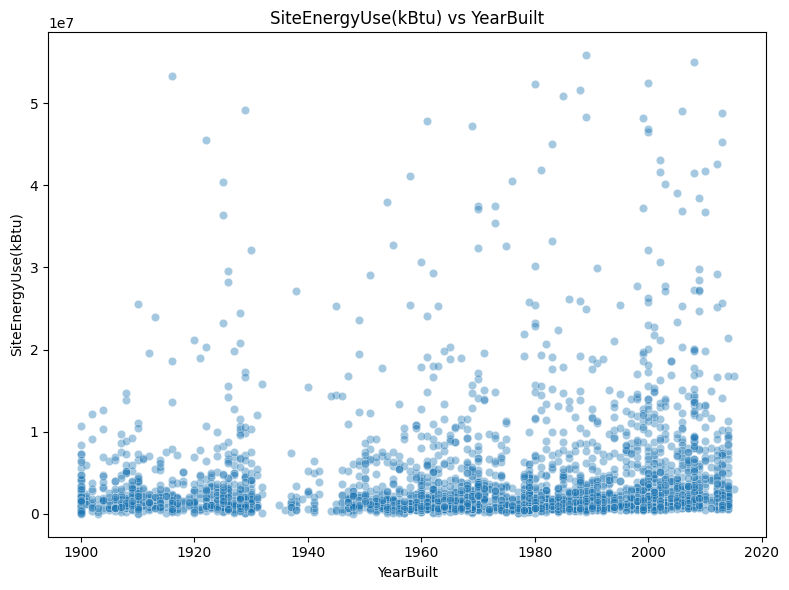

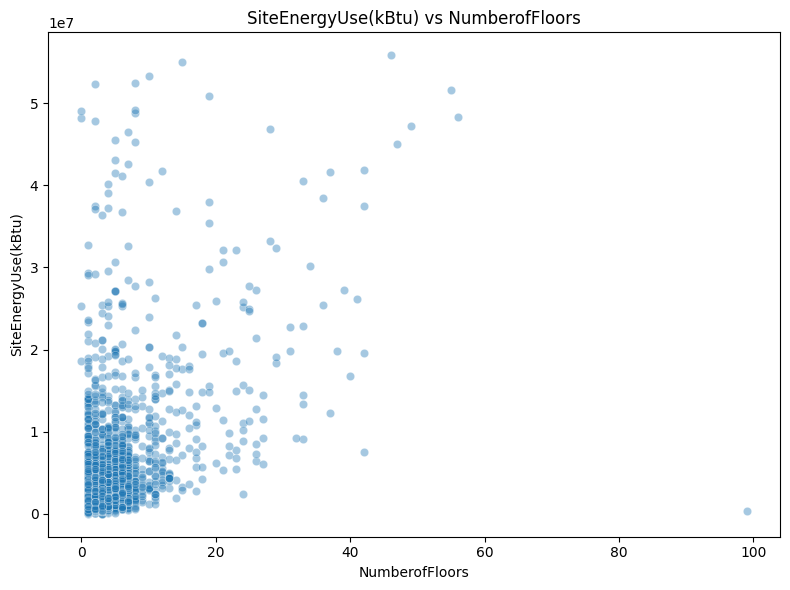

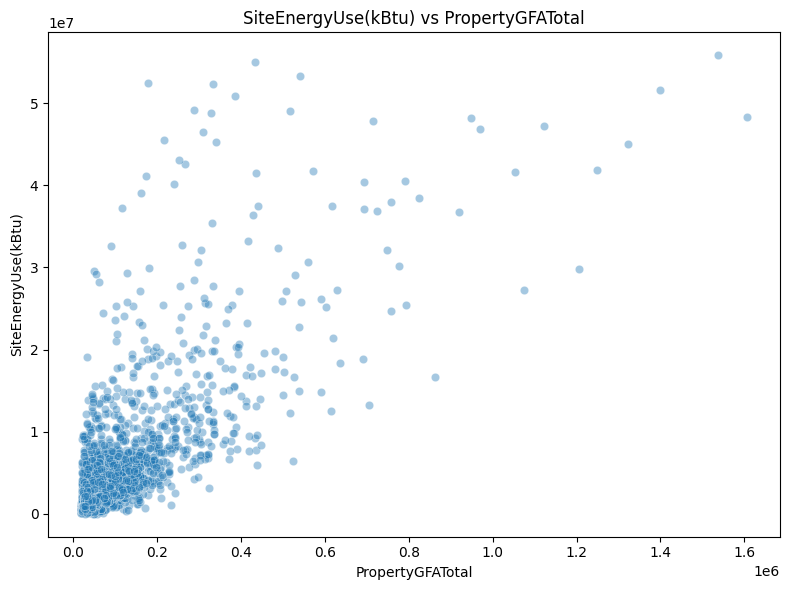

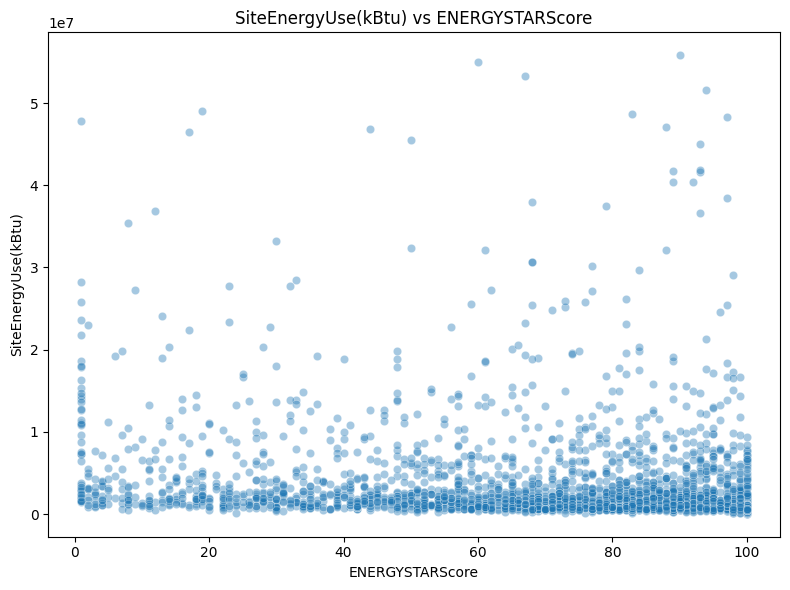

In [21]:
#5 Scatterplots vs target

for col in ["YearBuilt", "NumberofFloors", "PropertyGFATotal","ENERGYSTARScore"]:
    if col in df.columns:
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=df.sample(min(6000, len(df)), random_state=42),
                        x=col, y=target_col,
                        alpha=0.4)
        plt.title(f"{target_col} vs {col}")
        plt.tight_layout()
        plt.show()

**Observations**

Scatterplots reveal that YearBuilt and NumberofFloors have only weak relationships with total energy use: buildings of all ages and heights can exhibit both low and high consumption.

In contrast, PropertyGFATotal shows a strong and non-linear relationship with SiteEnergyUse, confirming that building size is one of the dominant predictors in the dataset.

The ENERGY STAR score presents the expected inverse correlation, but the signal is noisy due to a large number of missing or extreme values (0 and 100), which limits its predictive power.


**Consequences**

Overall, the scatterplots support the need for removing extreme outliers, and using tree-based models capable of capturing non-linear relationships.

#3 : Data Cleaning and Preprocessing

##Droping unecessary columns

In [22]:
target_col = "SiteEnergyUse(kBtu)"

#1 Keep only rows with valid, positive target
df = df[df[target_col].notna() & (df[target_col] > 0)]

#2 Keep only rows with valid, positive total floor area
if "PropertyGFATotal" in df.columns:
    df = df[df["PropertyGFATotal"].notna() & (df["PropertyGFATotal"] > 0)]

print("Shape after removing invalid target/GFA rows:", df.shape)

Shape after removing invalid target/GFA rows: (3294, 36)


In [23]:
#3 Remove variables  derived from energy consumption (target)

leakage_cols = [
    "Electricity(kWh)", "Electricity(kBtu)",
    "SteamUse(kBtu)",
    "NaturalGas(therms)", "NaturalGas(kBtu)",
    "OtherFuelUse(kBtu)",
    "GHGEmissions(MetricTonsCO2e)",
    "GHGEmissionsIntensity(kgCO2e/ft²)",
    "SiteEUI(kBtu/sf)", "SiteEU IWN(kBtu/sf)",
    "SourceEUI(kBtu/sf)", "SourceEU IWN(kBtu/sf)"
]

leakage_cols = [c for c in leakage_cols if c in df.columns]
df = df.drop(columns=leakage_cols)

print("Dropped leakage columns:", leakage_cols)
print("Shape after leakage drop:", df.shape)

Dropped leakage columns: ['Electricity(kWh)', 'Electricity(kBtu)', 'SteamUse(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)']
Shape after leakage drop: (3294, 27)


In [24]:
#4 Remove redundant area-related variables

redundant_cols = [
    "PropertyGFABuilding(s)",
    "PropertyGFAParking",
    "SecondLargestPropertyUseTypeGFA",
    "ThirdLargestPropertyUseTypeGFA"
]

redundant_cols = [c for c in redundant_cols if c in df.columns]
df = df.drop(columns=redundant_cols)

# Remove derived EUI column if created in the EDA
if "EUI" in df.columns:
    df = df.drop(columns=["EUI"])

print("Dropped redundant area/EUI columns:", redundant_cols)
print("Shape after redundancy drop:", df.shape)

Dropped redundant area/EUI columns: ['PropertyGFABuilding(s)', 'PropertyGFAParking', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']
Shape after redundancy drop: (3294, 23)


In [25]:
#5 Convert important categorical variables to 'object'

if "BuildingType" in df.columns:
    df["BuildingType"] = df["BuildingType"].astype(str)

if "CouncilDistrictCode" in df.columns:
    df["CouncilDistrictCode"] = df["CouncilDistrictCode"].astype(str)

##Preprocessing

In [32]:
#1 Feature engineering

# Building age
if "YearBuilt" in df.columns:
    df["BuildingAge"] = 2015 - df["YearBuilt"]

# Log transforms of skewed numeric features
df["log_PropertyGFATotal"] = np.log1p(df["PropertyGFATotal"])
df["log_LargestPropertyUseTypeGFA"] = np.log1p(df["LargestPropertyUseTypeGFA"])

# ENERGYSTARScore: treat 0 as missing (common anomaly)
if "ENERGYSTARScore" in df.columns:
    df.loc[df["ENERGYSTARScore"] == 0, "ENERGYSTARScore"] = np.nan

print(df.shape)

(3294, 26)


In [33]:
#2 X/y Split

X = df.drop(columns=[target_col])
y = np.log1p(df[target_col])

print("X shape:", X.shape)

X shape: (3294, 25)


In [34]:
#2 Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (2635, 25)
Test size: (659, 25)


In [35]:
#3
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Numeric preprocessing : median if null + scaling
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical preprocessing : "Missing" if null + enconding
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Full preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

print("Preprocessor ready.")

Preprocessor ready.


#4 : Baseline model - Linear Regression

**4 : Tree-based model : Random Forest Regressor**

**5 : Advanced model 1 : Gradient Boosting**

**6 : Advanced model 2 : XGBoost**

**7 : PCA**

**8 : Feature importance**

**9 : Comparison of models**